In [16]:

import pandas as pd
data=pd.read_csv('GujaratRainTSFinal(1).csv',index_col=0)

In [17]:

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv('GujaratRainTSFinal(1).csv', parse_dates=['datetime'], index_col='datetime',date_parser=dateparse)


In [18]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30, 10

In [19]:
ts=data['foo']
tstrain=ts




In [20]:
from statsmodels.tsa.stattools import adfuller


In [21]:
from statsmodels.tsa.arima_model import ARIMA


In [22]:
model = ARIMA(tstrain, order=(2, 0, 2))  
results_ARIMA = model.fit(disp=-1)  


In [23]:
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues, copy=True)
q=predictions_ARIMA>=0
for x in range(768):
    if(predictions_ARIMA[x]<0):
        predictions_ARIMA[x]=0.0

2018-01-01     14.060974
2018-02-01     43.203129
2018-03-01     74.114037
2018-04-01     97.755174
2018-05-01    109.535616
2018-06-01    109.386059
2018-07-01    100.560439
2018-08-01     87.839716
2018-09-01     75.796367
2018-10-01     67.583963
2018-11-01     64.445719
2018-12-01     65.884552
Freq: MS, dtype: float64

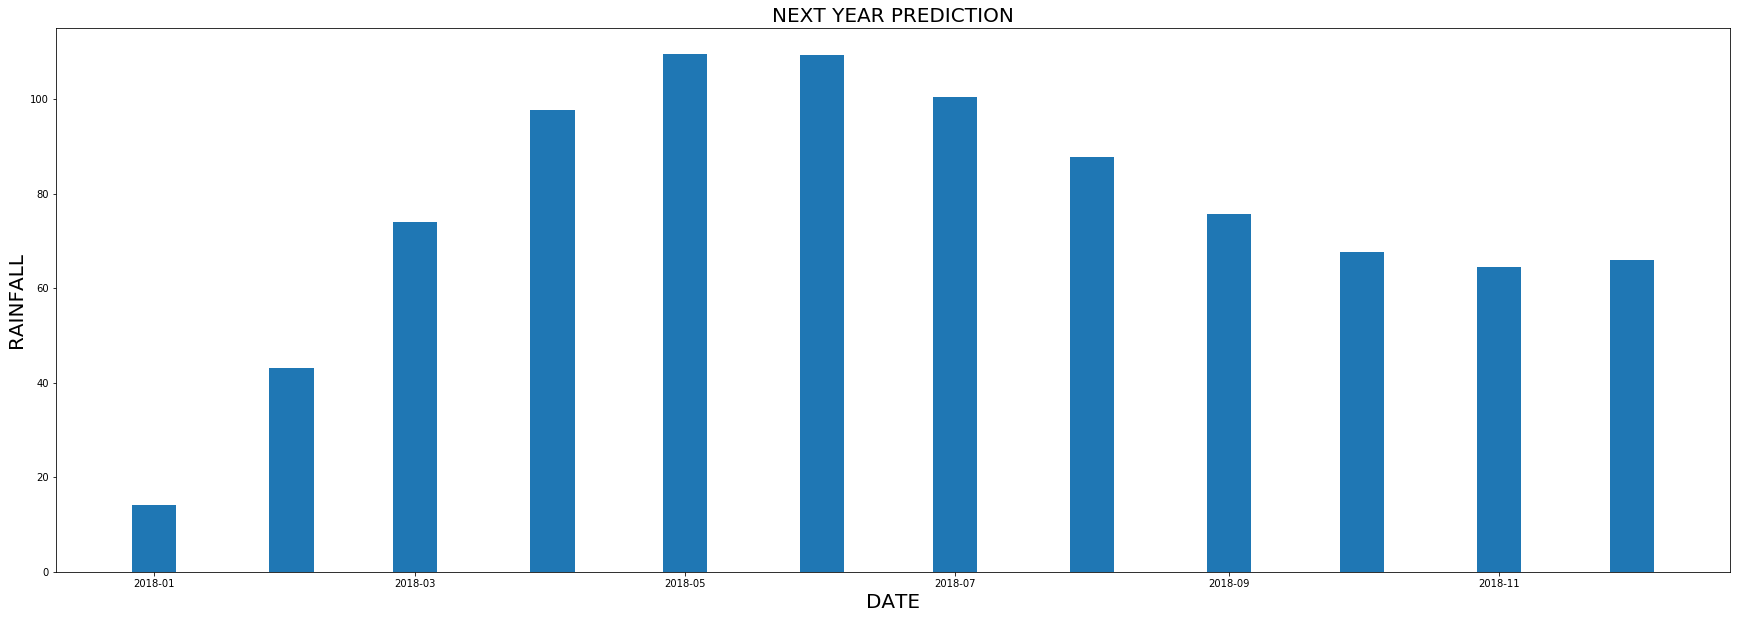

In [15]:
# multi-step out-of-sample forecast
start_index = 768
end_index = start_index + 11
forecast = results_ARIMA.predict(start=start_index, end=end_index)
plt.bar(forecast.index,forecast,width=10)
plt.title('NEXT YEAR PREDICTION',fontsize = 20)
plt.xlabel('DATE', fontsize = 20)
plt.ylabel('RAINFALL', fontsize = 20)
forecast